#Project 1 DATA 215

##Importing and Preprocessing Data

To best represent the data in my project, I needed to utilize various tools from several libraries and toolkits. I lost track of how many I had already imported and what I needed to import, so instead of doing so throughout the file, I put them all in this section after the matter.

In [46]:
# Data manipulation and scientific computing
import numpy as np
import pandas as pd
import random
import os
import requests
from os import path
from os import rename

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from matplotlib import font_manager
import matplotlib.colors as mcolors

# NLP processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Word cloud generation
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Downloading required nltk datasets
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

The dataset I will be working with is all about coffee and the original data came from http://www.coffeereview.com. There were several other people working on this dataset prior to myocntribution and although I could have taken the other version of this csv, file, I took the simpler version which had merged two spereate review columns into one and used countries as loaction identifiers rather than region.

Here is the kaggle link:
https://www.kaggle.com/datasets/schmoyote/coffee-reviews-dataset?select=coffee_analysis.csv

I wanted to use a custom font for my plots, but I realized it wasn't automatically included in Matplotlib's font managers. To resolve this, I uploaded the TTF file for the Lora font to my GitHub repository and manually added it to Matplotlib's font manager. This allowed me to set it as the default font for all my plots.

In [47]:
font_url = "https://github.com/dmembreno/first_repo/raw/refs/heads/main/Lora-VariableFont_wght.ttf"
font_path = "/tmp/Lora-VariableFont_wght.ttf"
response = requests.get(font_url)
with open(font_path, "wb") as f:
    f.write(response.content)
font_manager.fontManager.addfont(font_path)
plt.rcParams["font.family"] = "Lora"

In [48]:
site = "https://github.com/DavidMembreno/"
repo = "Data-Science/raw/refs/heads/main/"
file = "simplified_coffee.csv"
df = pd.read_csv(site+repo+file)
df.head()

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan..."
3,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Ethiopia,5.14,93,November 2017,"Delicate, richly and sweetly tart. Dried hibis..."
4,Ethiopia Gelgelu Natural Organic,Willoughby's Coffee & Tea,Medium-Light,United States,Ethiopia,3.97,93,November 2017,"High-toned, floral. Dried apricot, magnolia, a..."


As part of my data cleaning process, I wanted to address a few crucial points. First, I needed to check for any null entries. Next, I looked for duplicate rows. I also assessed whether the data was organized in a manageable way and ensured that the names made sense.

To start, I examined the dataset for null values.

In [49]:
df.info()
pd.isnull(df).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1246 non-null   object 
 1   roaster      1246 non-null   object 
 2   roast        1234 non-null   object 
 3   loc_country  1246 non-null   object 
 4   origin       1246 non-null   object 
 5   100g_USD     1246 non-null   float64
 6   rating       1246 non-null   int64  
 7   review_date  1246 non-null   object 
 8   review       1246 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 87.7+ KB


,0
name,0
roaster,0
roast,12
loc_country,0
origin,0
100g_USD,0
rating,0
review_date,0
review,0


In [50]:
df_null_rows = df[df.isnull().any(axis=1)]
df_null_rows

,name,roaster,roast,loc_country,origin,100g_USD,rating,review_date,review
132,Esmeralda Estate Panama Geisha,Difference Coffee,NaN,England,Panama,111.11,94,August 2018,Evaluated as espresso produced as a ristretto ...
480,Esmeralda Estate Panama Geisha,Difference Coffee,NaN,England,Panama,111.11,94,June 2020,Evaluated as espresso produced as a ristretto ...
481,Asfaw Maru Ethiopia Natural Cold Brew,Collage Coffee,NaN,United States,Ethiopia,1.32,93,July 2020,"A ready-to-drink black coffee, tested cold. Rh..."
482,Ethiopia Nano Challa Cold Brew,Bonfire Coffee Company,NaN,United States,Ethiopia,1.34,94,July 2020,"A ready-to-drink black coffee, tested cold. Ri..."
483,Brazil Ipanema Black Edition A-41 Red Cherry,GK Coffee,NaN,Taiwan,Brazil,4.27,94,July 2020,"A ready-to-drink black coffee, tested cold. Bi..."
606,Esmeralda Estate Panama Geisha,Difference Coffee,NaN,England,Panama,100.00,94,November 2020,Evaluated as espresso produced as a “ristretto...
822,Brazil Ipanema Golden Edition C26 Lychee,GK Coffee,NaN,Taiwan,Brazil,4.00,94,July 2021,"A ready-to-drink black coffee, tested cold. Dr..."
826,Esmeralda Estate Panama Geisha,Difference Coffee,NaN,England,Panama,111.11,94,August 2021,Evaluated as espresso produced as a “ristretto...
882,Ethiopia Guji Hambela Wate 74110/74112/74158 M...,Taster's Coffee,NaN,Taiwan,Ethiopia,3.17,93,September 2021,Evaluated as espresso produced as a “ristretto...
886,Yemen Lot 106,Port of Mokha,NaN,United States,Yemen,39.68,96,October 2021,"Deep yet soaring, vertically complex. Dried bl..."


In [51]:
df.dropna(inplace=True)

The information from the rows with null are dropped.

In [52]:
df.duplicated().sum()

0

Luckily there were no duplicated rows.

Now we renamed the columns for more clarity and chnaged the datatype of the review_date column to datetime form.

In [53]:
df['review_date'] = pd.to_datetime(df['review_date'])
df.rename(columns={'loc_country': 'roaster_country'}, inplace=True)
df.rename(columns={'origin': 'origin_country'}, inplace=True)
df.head(3)

<ipython-input-53-04bc9f0a8922>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,name,roaster,roast,roaster_country,origin_country,100g_USD,rating,review_date,review
0,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Ethiopia,4.70,92,2017-11-01,"Crisply sweet, cocoa-toned. Lemon blossom, roa..."
1,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Ethiopia,4.19,92,2017-11-01,"Delicate, sweetly spice-toned. Pink peppercorn..."
2,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Ethiopia,4.85,94,2017-11-01,"Deeply sweet, subtly pungent. Honey, pear, tan..."


In [54]:
df['origin_country'] = df['origin_country'].replace('Democratic Republic Of The Congo', 'Congo')

##Data Dictionary

####Data Dictionary for Coffee Dataset
Character Variables


---
* name: The name of the coffee blend

* roaster: The name of the roaster

* review: The text of the review

Date and Time Variables


---


* review_date: Indicates the review date (month,day,year)

Numerical Variables



---


* 100g_USD: Price per 100 grams of coffee in US dollars

* rating: The assigned ratings

Categorical Variables


---


* roast: The roast type (Dark, Medium-Dark, Medium, Medium-Light, Light)

* roaster_country: The country the roaster is located in

* origin_country: The country where the beans are from

##Exploratory Data Analysis (EDA)

In order to design graphics I found were visually appealing, I wanted to make sure I was using the correct colors, fonts , and layouts. Here I created the palettes and made variables of the colors I would use.

In [55]:
custom_palette = [
    '#BEA493','#887060', '#554132','#281604',
    '#000000']
custom_palette_v05 = [
    '#887060', '#554132','#BEA493','#281604',
    '#000000']
custom_palette2 = [#This is the best palette I have found that works for gradients
    '#BEA493', '#CDAA7B', '#7B5D4E', '#887060',
    '#6F4A3D', '#554132', '#3B2C23', '#4A3B31',
    '#3E2A24', '#281604', '#1C1C1C', '#000000'
]
custom_palette3 = [
    '#BEA493', '#CDAA7B', '#C6A17A', '#BFA572',
    '#7B5D4E', '#8A6B5B', '#887060',
    '#7A5B4C', '#6F4A3D', '#634034',
    '#554132', '#4A3B31',
    '#3E2A24', '#3B2C23',
    '#32241F', '#281604',
    '#1C1C1C', '#000000'
]

background_color = '#967969'
ocean_color = '#3498db'
coffee_bean_purple = '#52235D'
starbucks_green = '#006241'

###Univariate Analysis

#####Rating Variable

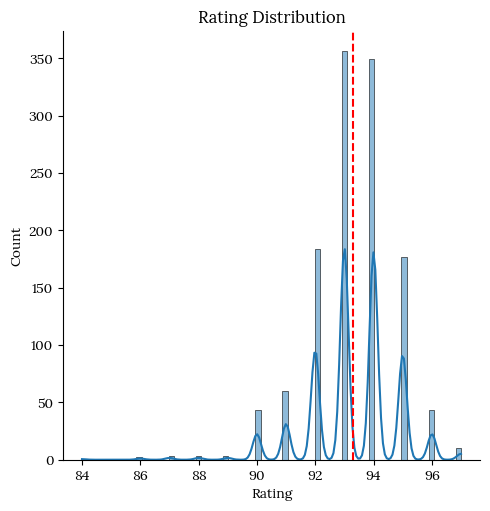

93.30064829821718

In [56]:
sns.displot(df['rating'],kde=True,kde_kws={'bw_adjust': 0.4})
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
rating_mean=df['rating'].mean()
#We created the rating_mean variable to plot a mean line
ax = plt.gca()
ax.axvline(x=rating_mean, color='red', linestyle='--')
plt.show()
rating_mean

Based on the reported ratings we see a main grouping fall between 90 and 96 with 93 and 94 seeming to have the most frequnecy in rating distribution. This red line on the plot represents the mean of the category which is about 93.

#####100g USD Variable

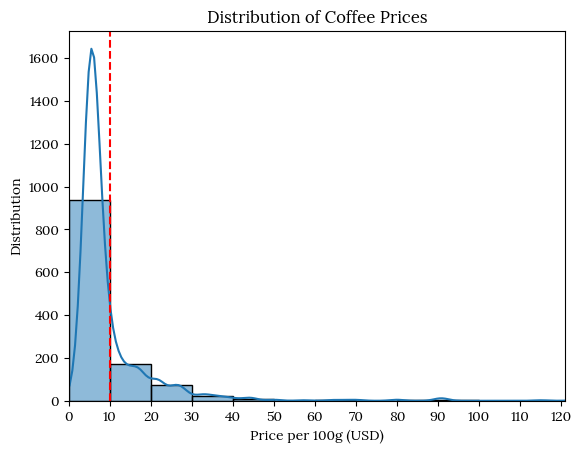

10.093679092382496


In [57]:
fig, ax = plt.subplots()
# Define bin width explicitly to ensure alignment
bins = np.arange(0, 121, 10)

sns.histplot(df['100g_USD'], bins=bins, kde=True, ax=ax,kde_kws={'bw_adjust': 0.6})
ax.set_xlim(0, 121)
tick_positions = range(0, 121, 10)
ax.set_xticks(tick_positions)
ax.set_xticklabels([str(tick) for tick in tick_positions])

plt.title('Distribution of Coffee Prices')
plt.xlabel('Price per 100g (USD)')
plt.ylabel('Distribution')
price_mean=df['100g_USD'].mean()
#We created the rating_mean variable to plot a mean line
ax = plt.gca()
ax.axvline(x=price_mean, color='red', linestyle='--')
plt.show()

print(price_mean)

In [58]:
price_table=df['100g_USD'].describe()
price_table

,100g_USD
count,1234.000000
mean,10.093679
std,11.965835
min,0.170000
25%,5.280000
50%,6.170000
75%,9.600000
max,132.280000


The average coffee price is approximately 10 dollars, with a significant portion of prices falling between 0 and 10. Prices above that range are more sparsely distributed. There are a few outliers that reach a maximum of 132. These outliers likely skew the average in a way that does not accurately represent the majority of the price values. Without these outliers, the average price would probably be closer to the range of 0 to 10.

#####Roast Variable

In [59]:
differenct_roasts_totals=df['roast'].value_counts()
roast_percentages=(df['roast'].value_counts())/len(df)*100
roast_table=pd.DataFrame({'Total':differenct_roasts_totals,'Percentage':roast_percentages})
roast_table

,Total,Percentage
roast,,
Medium-Light,904,73.257699
Light,198,16.045381
Medium,114,9.238250
Medium-Dark,15,1.215559
Dark,3,0.243112


<ipython-input-60-1a0c19890b3f>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




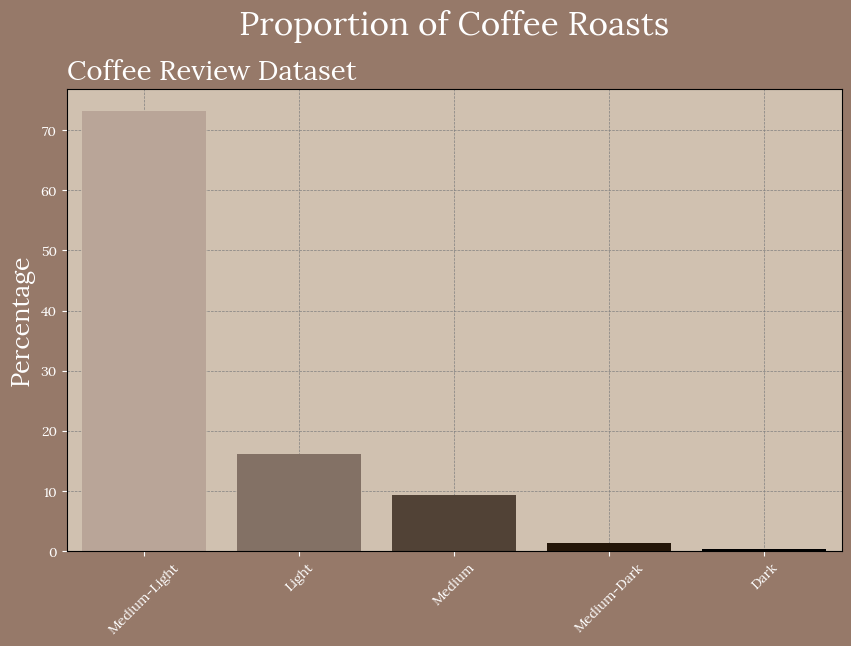

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=roast_percentages, ax=ax, palette=custom_palette)
ax.tick_params(axis='x', rotation=45, colors='white')
ax.tick_params(axis='y', colors='white')

plt.suptitle('Coffee Review Dataset', x=0.27,y=0.93, fontsize=20,color='white')
plt.title('Proportion of Coffee Roasts',y=1.1, fontsize=24,color='white')
plt.ylabel('Percentage', fontsize=18,color='white')
plt.xlabel('', fontsize=18,color='white')

fig.patch.set_facecolor('#967969')
ax.set_facecolor('#D0C1B0')
ax.grid(True, which='major', axis='both', color='grey', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

plt.show()


In [61]:
sum(df['roast']=='Dark')
df[df['roast']=='Dark']

,name,roaster,roast,roaster_country,origin_country,100g_USD,rating,review_date,review
341,Indonesia Sumatra Gayo Espresso,Simon Hsieh's Aroma Roast Coffees,Dark,Taiwan,Indonesia,8.50,94,2019-10-01,Evaluated as espresso. Very rich and deeply sw...
395,Sumatra Dark,Starbucks Coffee,Dark,United States,Indonesia,3.08,87,2020-02-01,"Roast-dominant, smoky-sweet. Dark chocolate, b..."
1054,Sumatra Dark,Starbucks Coffee,Dark,United States,Indonesia,3.82,90,2022-04-01,"Earthy, bittersweet. Fresh-cut oak, cocoa powd..."


As we can see, there are barely any dark roast rows in the dataset. The more poular roasts are the medium light, light and medium roasts. Medium-light in particular makes up almost 75% of the roast entries.

#####Roaster Country Variable

In [62]:
unique_countries = df['roaster_country'].unique()
print(unique_countries)

['United States' 'Canada' 'Hong Kong' "Hawai'i" 'Taiwan' 'Australia'
 'Guatemala' 'Japan' 'England' 'China' 'Kenya' 'New Taiwan']


In [63]:
country_counts = df['roaster_country'].value_counts().reset_index()
country_counts.columns = ['roaster_country', 'count']
print(country_counts)


   roaster_country  count
0    United States    771
1           Taiwan    334
2          Hawai'i     77
3        Guatemala     24
4        Hong Kong      9
5            Japan      8
6           Canada      5
7          England      2
8        Australia      1
9            China      1
10           Kenya      1
11      New Taiwan      1


In [64]:
sum(country_counts['count'])

1234

In [65]:
fig = px.choropleth(
    country_counts,
    locations='roaster_country',
    locationmode='country names',
    color='count',
    color_continuous_scale=custom_palette,
    scope='world',
    title='Density of Coffee Roasters by Country',
    labels={'count': 'Number of Roasters'}
)
fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    oceancolor="blue",
    showland=True,
    landcolor="#8a6651",
    lataxis=dict(showgrid=True, gridcolor='#362820'),
    lonaxis=dict(showgrid=True, gridcolor='#362820'),
    showframe=True,
    framecolor='black',
    framewidth=6
)
fig.update_layout(
    title_font=dict(size=24, family='Lora',color='white'),
    title_x=0.5,
    title_y=0.9,
    geo=dict(bgcolor='#967969'),
    paper_bgcolor='#291910',
    width=1100,
    coloraxis_colorbar=dict(
        x=0.9,
        title='Roasters',
        titlefont=dict(color='white'),
        tickfont=dict(color='white'),
    )
)


fig.show()


In terms of coffee roasting, most of the coffee produced here comes from the United States and Taiwan. The US has 774 roasters, while Taiwan has about 338. This is out of a total of 1,224 entries. I also found it interesting that Hawai'i is treated as a separate entity from the US.

For my plot, I struggled to find a representation that best illustrated the density of roasters by country. There were many good options, but my favorite idea was to use a map to show locations and a color gradient to indicate density. I wanted to use Pygwalker for that, but the Choropleth map from Plotly met my needs sufficiently and had a simple syntax.

#####Origin Country Variable

In [66]:
df['origin_country'].value_counts()

df['origin_country'].value_counts()[0]/len(df)*100

<ipython-input-66-b2e7a6efacc6>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



35.899513776337116

In [67]:
country_counts = df['origin_country'].value_counts().reset_index()
country_counts.columns = ['origin_country', 'count']

fig = px.choropleth(
    country_counts,
    locations='origin_country',
    locationmode='country names',
    color='count',
    color_continuous_scale=custom_palette,
    scope='world',
    title='Density of Coffee Origins by Country',
    labels={'count': 'Number of Origins'}
)
fig.update_geos(
    showcoastlines=True,
    coastlinecolor="Black",
    oceancolor="blue",
    showland=True,
    landcolor="#8a6651",
    lataxis=dict(showgrid=True, gridcolor='#362820'),
    lonaxis=dict(showgrid=True, gridcolor='#362820'),
    showframe=True,
    framecolor='black',
    framewidth=6
)
fig.update_layout(
    title_font=dict(size=24, family='Lora', color='white'),
    title_x=0.5,
    title_y=0.9,
    geo=dict(bgcolor='#967969'),
    paper_bgcolor='#291910',
    width=1100,
    coloraxis_colorbar=dict(
        x=0.9,
        title='Origins',
        titlefont=dict(color='white'),
        tickfont=dict(color='white'),
    )
)
fig.show()


Similar to the previous variable, here I also chose the Choropleth map. The majority of the coffee originates in Ethiopia, Colombia, Kenya, and Hawai'i. Ethiopia makes up 36% of the origins. In the future, it might be interesting the analyze the relationship between origin countries and roaster countries or the blend types and the origin countries.

#####Review Date Variable

In [68]:
df['review_date'].describe()

,review_date
count,1234
mean,2020-08-31 05:04:34.230145792
min,2017-11-01 00:00:00
25%,2019-08-01 00:00:00
50%,2020-11-01 00:00:00
75%,2021-11-01 00:00:00
max,2022-11-01 00:00:00


Ratings start at 2017 and end in 2022, so our data is recent as far as the past decade go, but leaves more to be desired

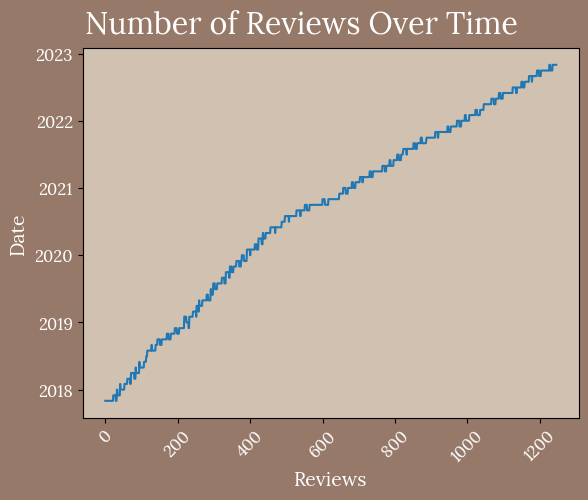

In [69]:
plt.rcParams['font.family'] = 'Lora'
sns.lineplot(df['review_date'])
plt.title('Number of Reviews Over Time',fontsize=22,color="white",y=1.02,x=0.44)
plt.xlabel('Reviews',fontsize=14,color="white")
plt.ylabel('Date',fontsize=14,color="white")
plt.xticks(rotation=45)
plt.xticks(fontsize=12,color="white")
plt.yticks(fontsize=12,color="white")
plt.gcf().patch.set_facecolor('#967969')
plt.gca().set_facecolor('#D0C1B0')
plt.show()

The time record shows that this data was collected from November 2017 to November 2022. Here in the plot, we see that as time progresses more reviews are recorded. This makes sense and is not very exciting. This trend could explain a rising interest in coffee over time but more likely than not it is just the result of an expanding dataset. However, it could provide valuable insights into the context of some of the other column entries.

#####Roaster Variable

<ipython-input-70-aab5ff77ca69>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-70-aab5ff77ca69>:3: UserWarning:

The palette list has more values (12) than needed (10), which may not be intended.



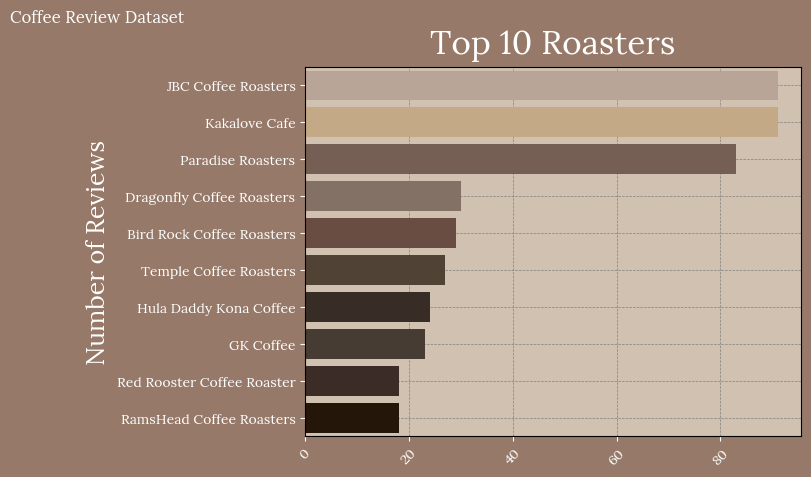

In [70]:
top_10_roasters=df['roaster'].value_counts()[:10]
fig, ax = plt.subplots()
sns.barplot(y=top_10_roasters.index, x=top_10_roasters.values, palette=custom_palette2)
ax.tick_params(axis='x', rotation=45, colors='white')
ax.tick_params(axis='y', colors='white')

plt.suptitle('Coffee Review Dataset', x=-0.2,y=1, fontsize=12,color='white')
plt.title('Top 10 Roasters',y=1.015, fontsize=24,color='white')
plt.ylabel('Number of Reviews', fontsize=18,color='white')
plt.xlabel('', fontsize=18,color='white')

fig.patch.set_facecolor('#967969')
ax.set_facecolor('#D0C1B0')
ax.grid(True, which='major', axis='both', color='grey', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
plt.show()


I have extracted the top ten coffee roasters mentioned in the roaster column. Kakalove Cafe, JBC, and Paradise are the clear leaders, with occurrences ranging from 80 to 90 times. The other roasters in the list have counts between 20 and 30. This plot visually shows these distributions.

#####Review Variable

In [71]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

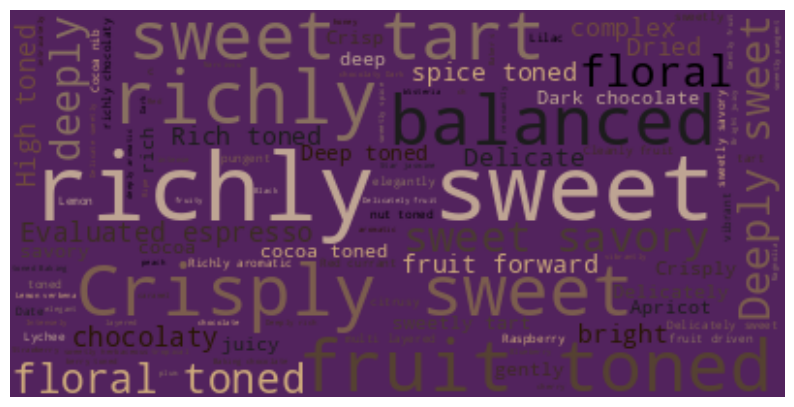

In [72]:
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)]))
lemmatizer = WordNetLemmatizer()
df['review'] = df['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df['review'] = df['review'].apply(nltk.word_tokenize)

df['review'] = df['review'].apply(lambda x: ' '.join(x))

text = df['review'].to_string(index=False)
wordcloud = WordCloud(max_font_size=50, max_words=100,
                      background_color=coffee_bean_purple,
                      color_func=lambda word,
                      font_size, position, orientation,
                      random_state=None,
                      **kwargs: random.choice(custom_palette2) ).generate(text)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Using some of the methods I learned in an earlier lecture, I decided that a word cloud could be useful for analyzing the reviews. In the word cloud, some of the larger words include variations of "rich," "sweet," "delicate," "fruit," "deep," and "flavor." All the words included in the cloud are presented without sentiment analysis, and it is evident that the descriptions of these coffee blends are overwhelmingly positive—there are no negative words present. Therefore, I assume that most of the reviews are likely favorable. This dataset may be somewhat skewed based on this information, especially considering that the ratings rarely fall below 90.

#####Names Variable

<ipython-input-73-6c40fb79dd4c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-73-6c40fb79dd4c>:5: UserWarning:

The palette list has more values (12) than needed (10), which may not be intended.



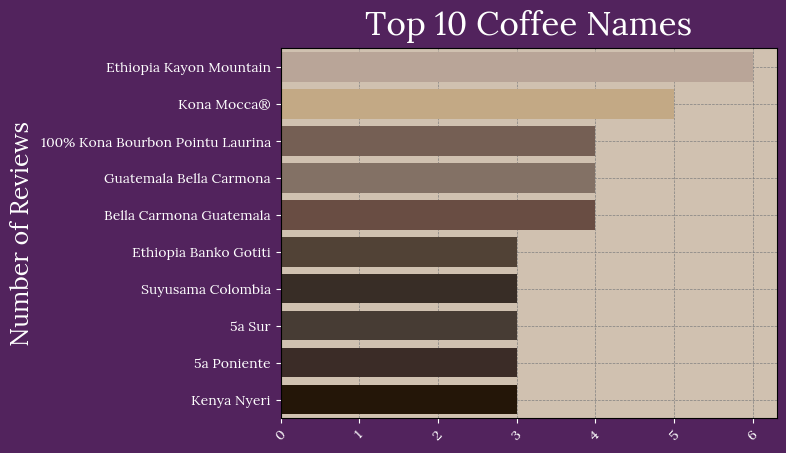

In [73]:
top_10_names = df['name'].value_counts()[:10]
fig, ax = plt.subplots()
fig.patch.set_facecolor(coffee_bean_purple)
ax.set_facecolor('#D0C1B0')
sns.barplot(y=top_10_names.index, x=top_10_names.values, palette=custom_palette2)
ax.grid(True, which='major', axis='both', color='grey', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.tick_params(axis='x', rotation=45, colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_title('Top 10 Coffee Names',y=1.015, fontsize=24,color='white')
ax.set_ylabel('Number of Reviews', fontsize=18,color='white')
ax.set_xlabel('', fontsize=18,color='white')
plt.show()

Overall, the coffee blend names are mentioned in similar frequencies throughout the data, with Ethiopia Kayon Mountain appearing the most among the top ten, while 5a Poniente appears the least in the list. The names themselves are not particularly unique; some refer to the origin of the beans, while others suggest the flavor profile.

###Multivariate and Bivariate Analysis

####Rating vs Price (Numeric vs Numeric)

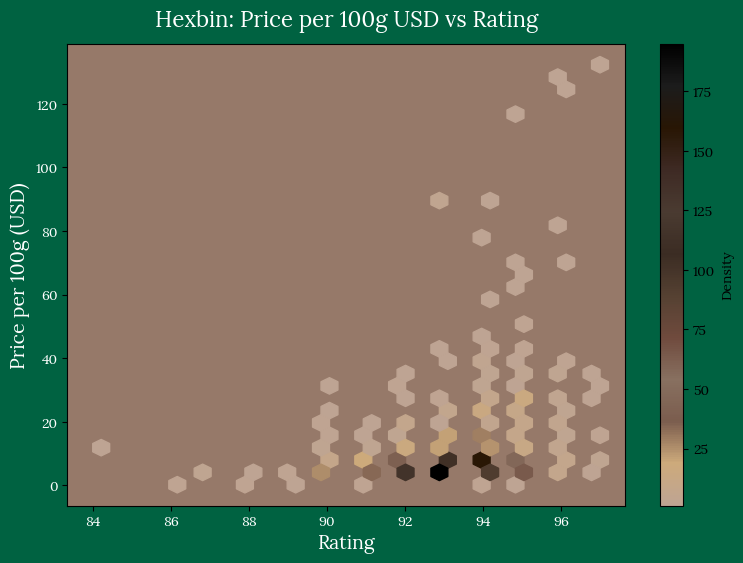

In [74]:
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_palette2_cmap", custom_palette2)
plt.figure(figsize=(9, 6))
hb = plt.hexbin(df['rating'], df['100g_USD'], gridsize=30, cmap=custom_cmap, mincnt=1)
plt.title('Hexbin: Price per 100g USD vs Rating', fontsize=16, color="white", y=1.02)
plt.xlabel('Rating', fontsize=14, color="white")
plt.ylabel('Price per 100g (USD)', fontsize=14, color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor('#967969')
plt.colorbar(hb, label='Density')
plt.gcf().patch.set_facecolor(starbucks_green)
plt.show()


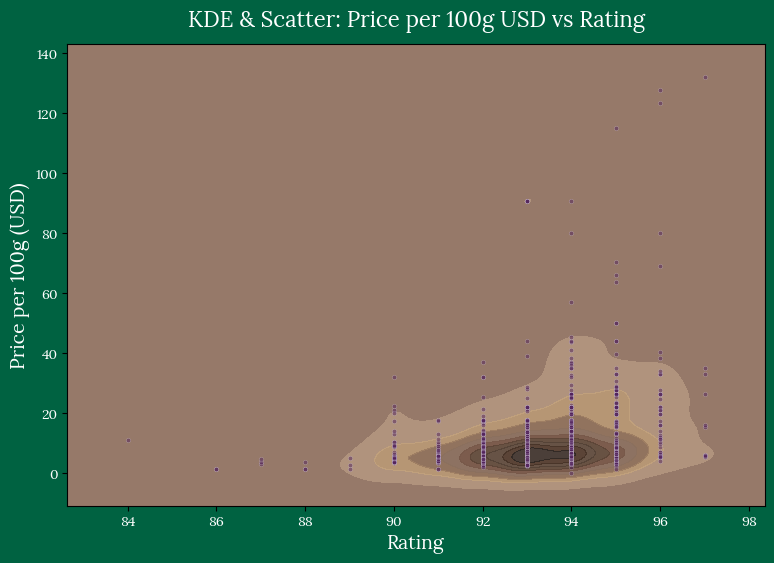

In [75]:
plt.figure(figsize=(9, 6))
sns.kdeplot(data=df, x='rating', y='100g_USD', cmap=custom_cmap, fill=True, alpha=0.6)
sns.scatterplot(data=df, x='rating', y='100g_USD', color=coffee_bean_purple, s=10, alpha=0.5)
plt.title('KDE & Scatter: Price per 100g USD vs Rating', fontsize=16, color="white", y=1.02)
plt.xlabel('Rating', fontsize=14, color="white")
plt.ylabel('Price per 100g (USD)', fontsize=14, color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor('#967969')
plt.gcf().patch.set_facecolor(starbucks_green)
plt.show()

In both of these plots, I aimed to explore how price affects ratings. Generally, we observe that the ratings rarely fall below 90. Additionally, the price density is primarily concentrated in the 0 to 10 dollar range, as illustrated by the hexbin and KDE plots. The scatterplot layered over the KDE shows that in some areas, higher-priced items receive high ratings. However, due to the limited variation in ratings, we cannot draw any strong conclusions about this relationship. It does not appear to be linear  at all and may even seem non-existent.

####Origin Country vs Count of Roast types (Categorical vs Categorical)

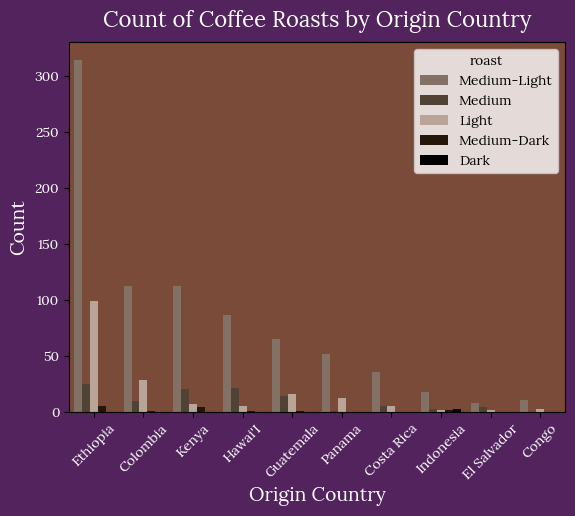

In [76]:
top_ten_countries = df['origin_country'].value_counts()[:10]
top_ten_countries
sns.countplot(data=df, x='origin_country',order=top_ten_countries.index, hue='roast', palette=custom_palette_v05)
plt.title('Count of Coffee Roasts by Origin Country', fontsize=16, color="white", y=1.02)
plt.xlabel('Origin Country', fontsize=14, color="white")
plt.ylabel('Count', fontsize=14, color="white")
plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.gca().set_facecolor('#7B4B3A')
plt.gcf().patch.set_facecolor(coffee_bean_purple)
plt.show()

This plot shows the counts of roast types across different countries. In Ethiopia, we observe that medium-light roasts dominate, and this pattern holds true for most other countries, where medium-light blends are also the most commonly produced. Light roasts are particularly notable in Ethiopia, which leads to their production. Medium-dark and dark roasts, on the other hand, are rarely produced across all countries, indicating a general preference or market trend towards lighter roast profiles.

####Rating vs Roast (Categorical vs Numeric)

In [77]:
roast_ratings = df.groupby('roast')['rating'].agg(['mean', 'count'])
roast_ratings

,mean,count
roast,,
Dark,90.333333,3
Light,93.555556,198
Medium,92.543860,114
Medium-Dark,92.333333,15
Medium-Light,93.366150,904


<ipython-input-78-104ee320be5a>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




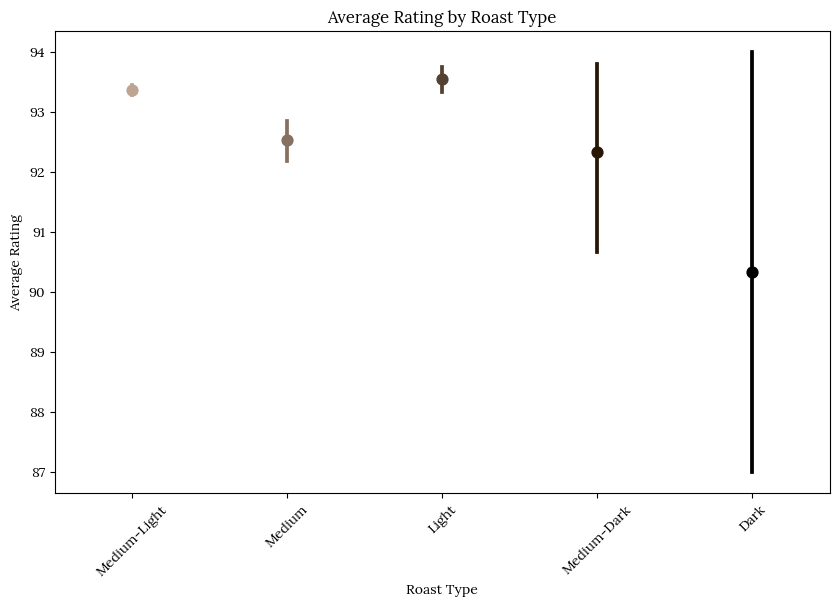

In [78]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='roast', y='rating', palette=custom_palette)
plt.title('Average Rating by Roast Type')
plt.xlabel('Roast Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


<ipython-input-79-d36fe29999af>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




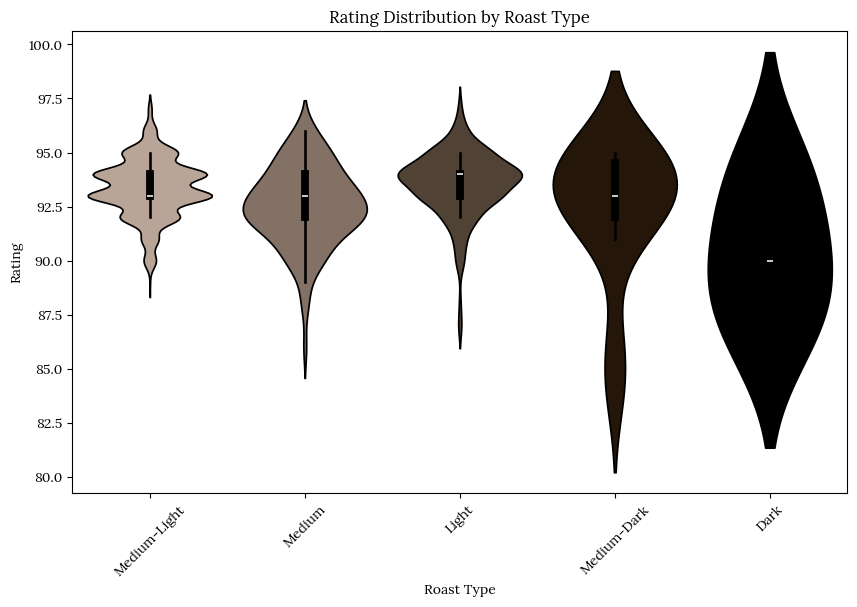

In [79]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='roast', y='rating', palette=custom_palette)
plt.title('Rating Distribution by Roast Type')
plt.xlabel('Roast Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


The table and plots above illustrate the relationship between roast type and rating. Medium-light and light roasts have the highest average ratings, while dark roasts have the lowest. These trends are well-captured in the point and violin plots. In the violin plots, the median lines for all roast types are relatively similar, except for dark roasts, which diverge with a lower median. The interquartile ranges are also consistent across roast types until dark, where we see a clear drop.

The medium-dark roast plot shows a broader range, indicated by its extended violin shape. Though medium-dark has some narrow sections, which highlight denser clusters of ratings—particularly beyond 87.5 and below 97.5—indicating frequent occurrences in these ranges. Meanwhile, medium-light roasts have an interesting shape with gaps in the ridges, suggesting that certain ratings within the range are underrepresented while surrounding values have higher occurrences. Overall, the other violin plots are relatively smooth, showing more consistent distributions of ratings.

##Insights and Findings

###Summary of Findings

There are several key findings from this data exploration project. First of all, need to address the rating distribution. The ratings for the coffee blends predominantly cluster between 90 and 96, with a mean rating of approximately 93. This suggests a general trend of high-quality coffee selections in the dataset. Very few ratings fall below this range, indicating a potential bias in reviews or a lack of representation of lower-quality products.

Another section of this analysis that pointed to the idea of bias was found in the word cloud. The word cloud generated from the reviews highlights positive descriptors such as "rich," "sweet," and "flavor," indicating an overwhelmingly favorable sentiment toward the coffee blends.

Additionally, we noted that the average price of the products is recorded to be approximately $10 per 100 grams of coffee beans. The general concentration was in the range of 0  to 10 dollars. An outlier of 132 dollars was recorded and outliers similar to this one greatly skew the average.

For the types of roast, a clear preference for the light and medium-light roasts account for nearly 75% of entries. Roasts that are significantly less represented are Dark roasts and medium roasts.

The majority of coffee roasters are based in the United States (774 roasters) and Taiwan (338 roasters). Ethiopia, Colombia, and Kenya are the leading origin countries for coffee bean extraction.

The analysis of the relationship between price and rating revealed no clear linear correlation. While higher prices are sometimes associated with high ratings, the overall density of ratings tends to remain high across all price ranges. This complexity may require more nuanced analysis to uncover underlying patterns.

The count of roast types by origin country indicates that medium-light roasts are prevalent in Ethiopia and other key coffee-producing nations.


### Questions
In the future, it might be interesting to conduct a detailed sentiment analysis of the reviews and look into what proportions are positive vs negative. This might help point us to a clearer conclusion on whether we were working with a biased dataset or not.

Looking the the time variable in detail might be more interesting, perhaps we could uncover seasonal trends or even view how sentiment has changed over time for coffee selections.

Investigating the outliers of the prices also seems worthwhile. What makes one coffee blend significantly more expensive compared to the others?

All in all, what would most significantly impact this research would be pulling information from other datasets like the Coffee Quality Index datasets that can easily be found on Kaggle. Might we see recurring trends, names, or roasters? What information and insight so could we derive from that?  
